In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data\\sp500.xlsx")
df.head()

,Date,Open,High,Low,Close,Volume
0,03-01-00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,04-01-00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,05-01-00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,06-01-00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,07-01-00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


## 时序的数据预处理

In [3]:
# 日期列转换
df['Date'] = pd.to_datetime(df['Date'])
df.head()

C:\Users\jack\AppData\Local\Temp\ipykernel_16488\773972606.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume
0,2000-03-01,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,2000-04-01,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,2000-05-01,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,2000-06-01,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,2000-07-01,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [4]:
# 时间序列的聚合
df = df.resample(
            rule='M',   # M:按月聚合; W:按周聚合; D:按天聚合
            on='Date').mean() 
df.head()

C:\Users\jack\AppData\Local\Temp\ipykernel_16488\440790038.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(


,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31,1422.309509,1436.489002,1410.382513,1424.124005,1.069355e+09
2000-02-29,1391.677782,1403.917779,1379.257209,1391.433892,1.068028e+09
2000-03-31,1456.239990,1474.273743,1442.749995,1461.503744,1.067104e+09
2000-04-30,1433.221110,1447.548889,1409.087789,1429.893331,1.071120e+09
2000-05-31,1425.875494,1440.216522,1410.833508,1427.122498,9.234650e+08


## 时序的趋势分解

Text(0.5, 1.0, 'residual')

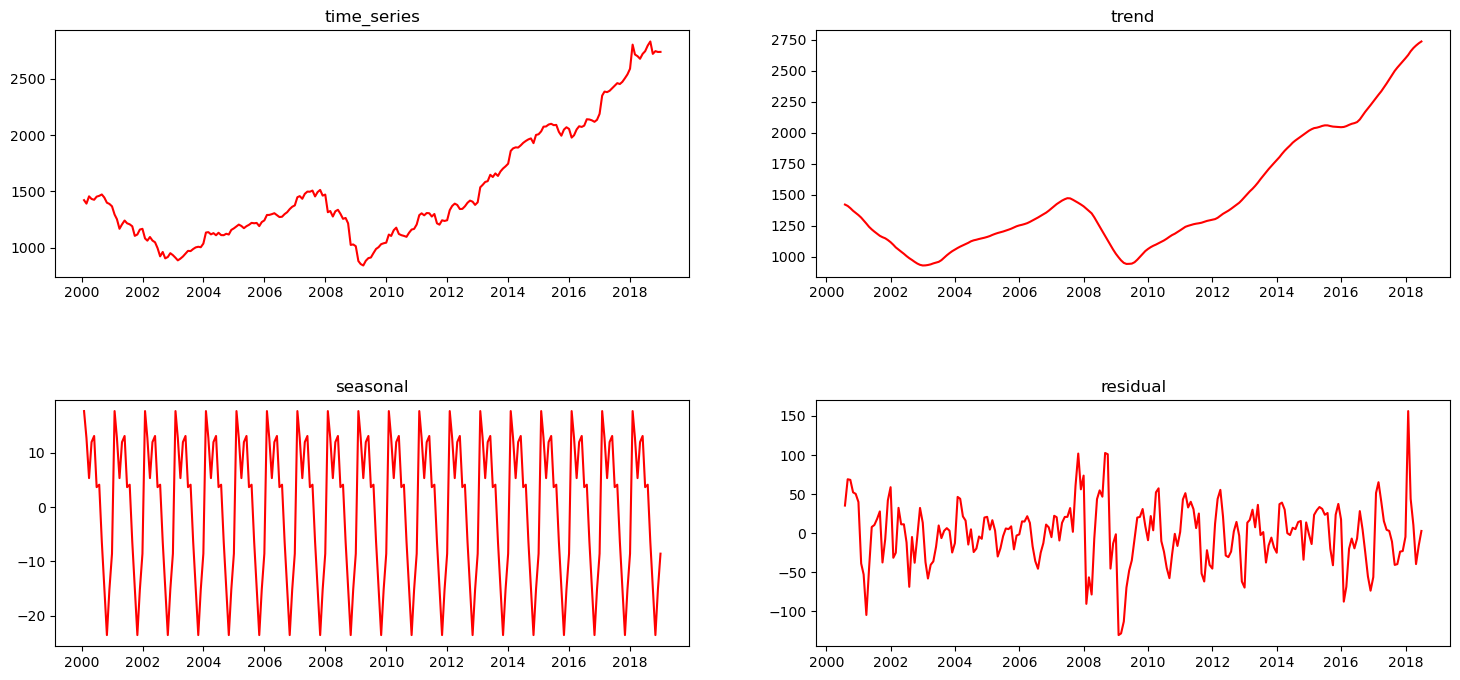

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(df['Open'])

# 绘制原始数据、趋势、季节性和残差
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)               # 同一列元素AX之间距离

ax[0][0].plot(df['Open'], color='r')
ax[0][0].set_title("time_series")

ax[0][1].plot(result.trend, color='r')
ax[0][1].set_title("trend")

ax[1][0].plot(result.seasonal, color='r')
ax[1][0].set_title("seasonal")

ax[1][1].plot(result.resid, color='r')
ax[1][1].set_title("residual")

## 时序的检验

p值小于0.05才能确定时间序列平稳，否则就需要进行差分，然后再进行检验

In [6]:
from statsmodels.tsa.stattools import adfuller

# ADF检验
result = adfuller(df['Open'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.6853053564574019
p-value: 0.9980922116495986
Critical Values:
   1%, -3.4594900381360034
Critical Values:
   5%, -2.8743581895178485
Critical Values:
   10%, -2.573601605503697


In [7]:
df['Open'].head()

Date
2000-01-31    1422.309509
2000-02-29    1391.677782
2000-03-31    1456.239990
2000-04-30    1433.221110
2000-05-31    1425.875494
Freq: ME, Name: Open, dtype: float64

In [8]:
# 对数据进行一次差分
df['Open_diff'] = df['Open'].diff()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,Open_diff
Date,,,,,,
2000-02-29,1391.677782,1403.917779,1379.257209,1391.433892,1.068028e+09,-30.631727
2000-03-31,1456.239990,1474.273743,1442.749995,1461.503744,1.067104e+09,64.562208
2000-04-30,1433.221110,1447.548889,1409.087789,1429.893331,1.071120e+09,-23.018880
2000-05-31,1425.875494,1440.216522,1410.833508,1427.122498,9.234650e+08,-7.345616
2000-06-30,1453.397827,1463.136528,1441.573492,1450.915209,1.046096e+09,27.522333


In [9]:
from statsmodels.tsa.stattools import adfuller

# ADF检验
result = adfuller(df['Open_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -13.481804789332976
p-value: 3.230394119447755e-25
Critical Values:
   1%, -3.4596204846395824
Critical Values:
   5%, -2.8744153028455948
Critical Values:
   10%, -2.5736320761218576


Text(0.5, 1.0, 'Open_diff')

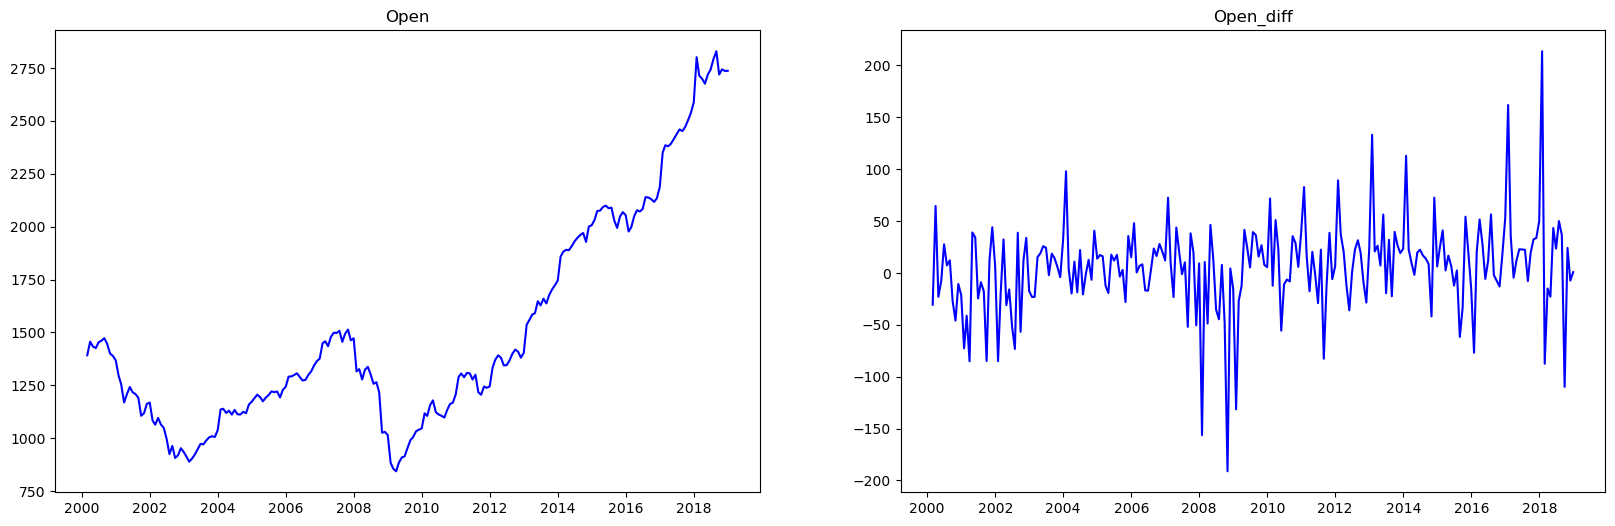

In [10]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(df['Open'], color='b')
plt.title('Open')
plt.subplot(1, 2, 2)
plt.plot(df['Open_diff'], color='b')
plt.title('Open_diff')

## 时间序列预测

时间序列预测中的解释性强的模型通常指那些能够提供明确的预测依据和解释的模型。以下是一些具有较强解释性的时间序列预测模型：


In [11]:
import pandas as pd # 数据操作库
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）

# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False


# 这里假设 df 已经是你的 DataFrame，并且 'open' 是时间序列数据列
ts = df['Open_diff']

# 拆分训练集和测试集（例如，最后20个数据点作为测试集）
train = ts[:-20]
test = ts[-20:]


1. **ARIMA（自回归积分滑动平均模型）**：
   - **解释性**：ARIMA模型通过自回归（AR）、差分（I）和移动平均（MA）三个部分来捕捉时间序列的特征。参数的选择和模型的拟合过程可以清楚地解释时间序列的结构和趋势。
   - **例子**：对于季度销售数据，ARIMA模型可以解释过去几季的销售数据对当前销售的影响。


In [12]:
# 1. ARIMA 模型
model_arima = sm.tsa.ARIMA(train, order=(1, 1, 1))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=20)

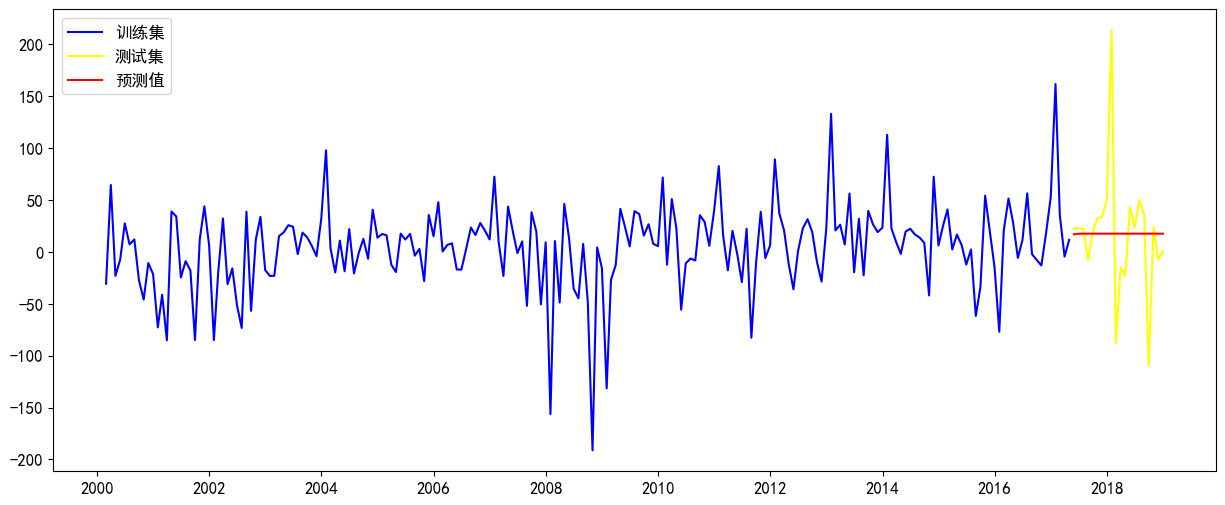

In [13]:
# 绘制结果
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='训练集', color='blue')
plt.plot(test.index, test, label='测试集', color='yellow')
plt.plot(test.index, forecast_arima, label='预测值', color='red')
plt.legend()
plt.show()

In [14]:
# 打印模型摘要以获取详细信息
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Open_diff   No. Observations:                  207
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1055.825
Date:                Mon, 05 Aug 2024   AIC                           2117.650
Time:                        11:28:44   BIC                           2127.634
Sample:                    02-29-2000   HQIC                          2121.688
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1048      0.095      1.106      0.269      -0.081       0.291
ma.L1         -0.9562      0.027    -35.444      0.000      -1.009      -0.903
sigma2      1639.1215    110.398     14.847      0.0


2. **SARIMA（季节性自回归积分滑动平均模型）**：
   - **解释性**：SARIMA模型在ARIMA的基础上增加了季节性成分，能够更好地捕捉具有季节性波动的时间序列数据。
   - **例子**：对于每月的电力消耗数据，SARIMA模型可以解释每年的季节性变化以及其他非季节性因素对电力消耗的影响。


In [15]:
# 2. SARIMA 模型
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
forecast_sarima = model_sarima_fit.forecast(steps=20)

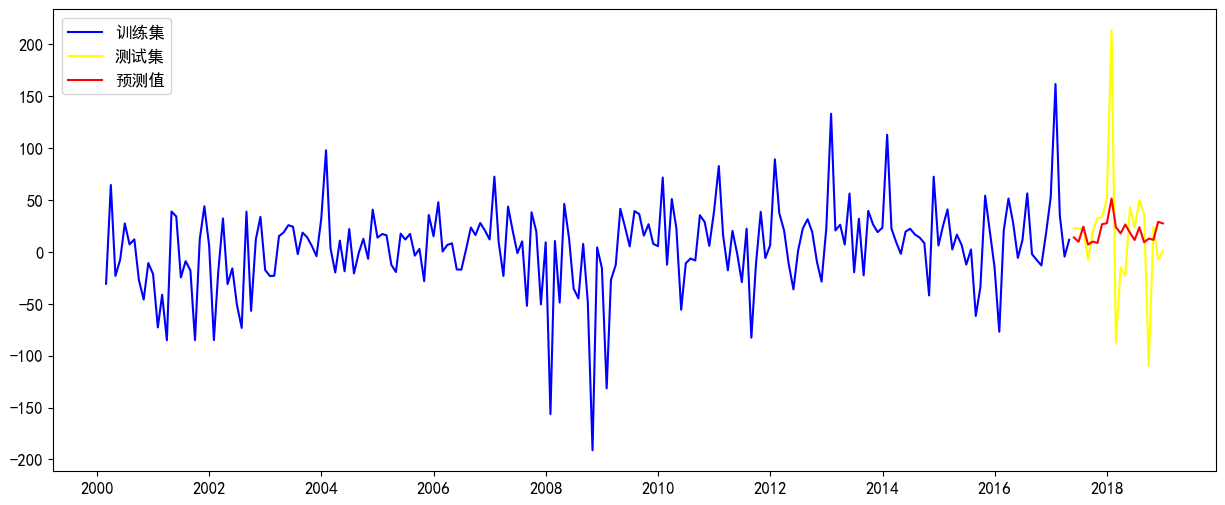

In [16]:
# 绘制结果
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='训练集', color='blue')
plt.plot(test.index, test, label='测试集', color='yellow')
plt.plot(test.index, forecast_sarima, label='预测值', color='red')
plt.legend()
plt.show()

In [17]:
# 打印模型摘要以获取详细信息
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Open_diff   No. Observations:                  207
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1013.225
Date:                            Mon, 05 Aug 2024   AIC                           2036.449
Time:                                    11:28:45   BIC                           2052.789
Sample:                                02-29-2000   HQIC                          2043.066
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1144      0.107      1.071      0.284      -0.095       0.324
ma.L1         -0.9944      0.143   


3. **指数平滑模型（Exponential Smoothing Models）**：
   - **解释性**：指数平滑模型（如Holt-Winters模型）通过对过去数据加权平均来预测未来值，权重逐渐递减，使得最近的数据对预测影响更大。模型中的参数可以解释趋势和季节性成分。
   - **例子**：对于一个公司的月度收入数据，Holt-Winters模型可以解释收入的长期趋势和季节性波动。


In [18]:
# 3. Holt-Winters 模型
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_hw = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
model_hw_fit = model_hw.fit()
forecast_hw = model_hw_fit.forecast(steps=20)

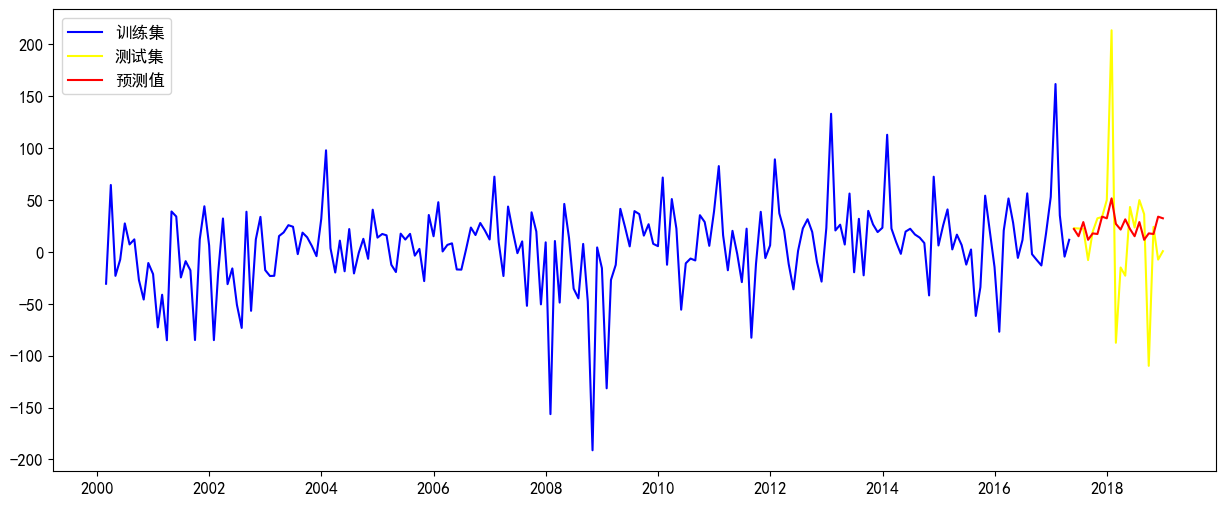

In [19]:
# 绘制结果
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='训练集', color='blue')
plt.plot(test.index, test, label='测试集', color='yellow')
plt.plot(test.index, forecast_hw, label='预测值', color='red')
plt.legend()
plt.show()

In [20]:
# 打印模型摘要以获取详细信息
print(model_hw_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Open_diff   No. Observations:                  207
Model:             ExponentialSmoothing   SSE                         354432.776
Optimized:                         True   AIC                           1569.230
Trend:                             None   BIC                           1615.888
Seasonal:                      Additive   AICC                          1572.093
Seasonal Periods:                    12   Date:                 Mon, 05 Aug 2024
Box-Cox:                          False   Time:                         11:28:45
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1468891                alpha                 True
smoothing_seasonal       